<a href="https://colab.research.google.com/github/praveen-pethurajan/EVA6/blob/main/session8/CIFAR10_Image_Classification_Resnet18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 8 - Advanced Training Concepts
## Clone Github Repo

In [ ]:
%rm -rf 'EVA6'
!git clone https://github.com/praveen-pethurajan/EVA6

Cloning into 'EVA6'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 151 (delta 68), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (151/151), 1.44 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (68/68), done.


In [ ]:
import sys
sys.path.append('/EVA6/cv_wrapper')

!pip install git+https://github.com/albumentations-team/albumentations.git


  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-ew6zkv1m
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-ew6zkv1m
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98531 sha256=1bf36bb46efb56dec713754b5905d7dbde900059e9ca1b4f865b9d6920c26e72
  Stored in directory: /tmp/pip-ephem-wheel-cache-u2od4vus/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Importing Libraries

In [ ]:
from EVA6.cv_wrapper.models import resnet
from EVA6.cv_wrapper import utils
from EVA6.cv_wrapper import main
from EVA6.cv_wrapper.visualize import VisualizeCam

!pip install torchsummary
from torchsummary import summary

import torch

## Fetch network model, device, optimizer, scheduler

In [ ]:
device, best_acc, classes, net, criterion, optimizer, scheduler = main.define_model_utilities(loss="cross_entropy", optimizer_func="SGD", lr=0.1)

## Print Model Summary

In [ ]:
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

## Configure the transformation to apply on train dataset

In [ ]:
tensor_transforms, numpy_transforms = utils.train_transform(["totensor", "normalize_mean", "randomcrop", "horizontal_flip", "cutout", "random_rotate"])

## Fetch train and test set after applying transformation

In [ ]:
train_set, test_set = utils.load_dataset(tensor_transforms, numpy_transforms)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Create Data loaders

In [ ]:
train_loader, test_loader = main.dataloaders(train_set, test_set)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Train model

In [ ]:
train_loss, train_acc, test_loss, test_acc = main.start_training(40, net, criterion, optimizer, device, train_loader, test_loader, best_acc, scheduler)


Epoch: 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Loss: 2.758 | Train Acc: 15.316% (7658/50000)
Test Loss: 2.156 | Test Acc: 20.700% (2070/10000)

Epoch: 2
Train Loss: 2.009 | Train Acc: 24.516% (12258/50000)
Test Loss: 1.873 | Test Acc: 30.850% (3085/10000)

Epoch: 3
Train Loss: 1.829 | Train Acc: 31.166% (15583/50000)
Test Loss: 1.703 | Test Acc: 35.880% (3588/10000)

Epoch: 4
Train Loss: 1.703 | Train Acc: 36.272% (18136/50000)
Test Loss: 1.626 | Test Acc: 40.220% (4022/10000)

Epoch: 5
Train Loss: 1.616 | Train Acc: 40.038% (20019/50000)
Test Loss: 1.485 | Test Acc: 44.250% (4425/10000)

Epoch: 6
Train Loss: 1.511 | Train Acc: 44.064% (22032/50000)
Test Loss: 1.320 | Test Acc: 51.100% (5110/10000)

Epoch: 7
Train Loss: 1.417 | Train Acc: 48.194% (24097/50000)
Test Loss: 1.254 | Test Acc: 53.870% (5387/10000)

Epoch: 8
Train Loss: 1.327 | Train Acc: 51.942% (25971/50000)
Test Loss: 1.244 | Test Acc: 54.070% (5407/10000)

Epoch: 9
Train Loss: 1.246 | Train Acc: 54.984% (27492/50000)
Test Loss: 1.350 | Test Acc: 50.630% (5063/1

## Fetch correctly and wrongly predicted images

In [ ]:
correct_images, incorrect_images = utils.identify_images(net, criterion, device, test_loader, 20)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Plot graph for losses and accuracies

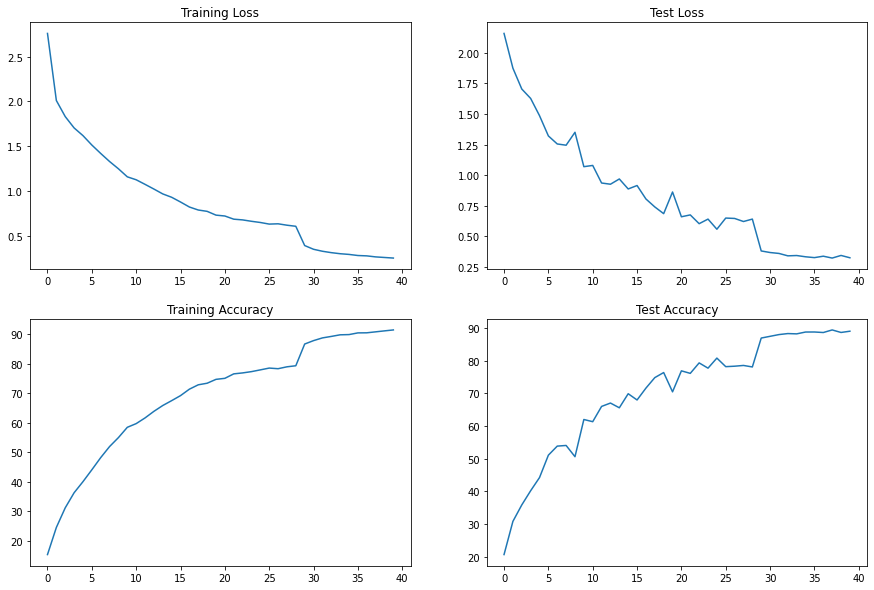

In [ ]:
utils.plot_graph(train_loss, train_acc, test_loss, test_acc)

## Plot Correctly predicted Images

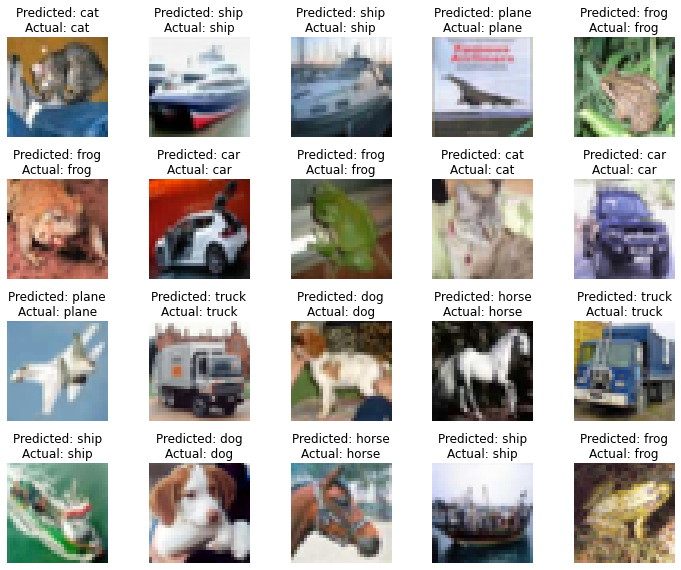

In [ ]:
utils.plot_images(correct_images, classes)

## Plot wrongly predicted images

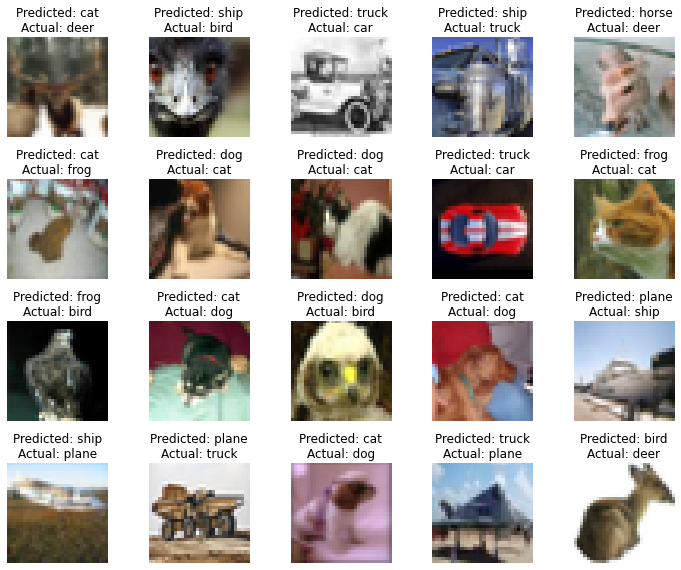

In [ ]:
utils.plot_images(incorrect_images, classes)

## Plot gradcam for correctly predicted Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


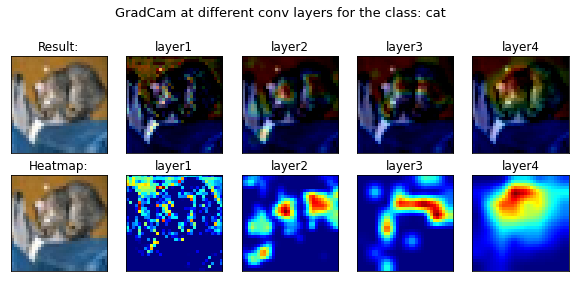

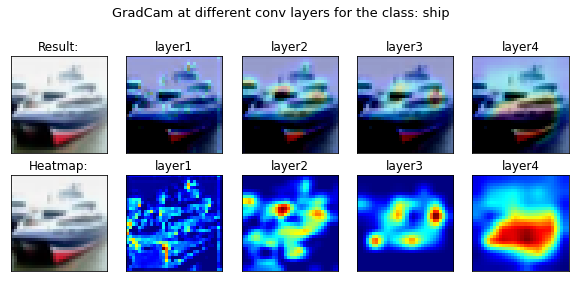

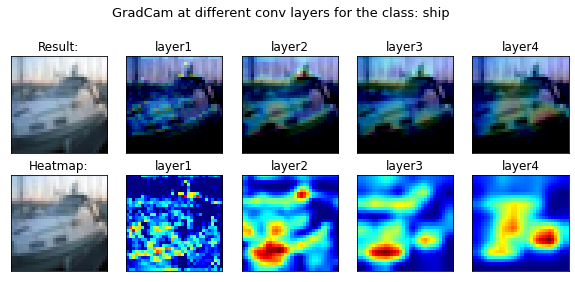

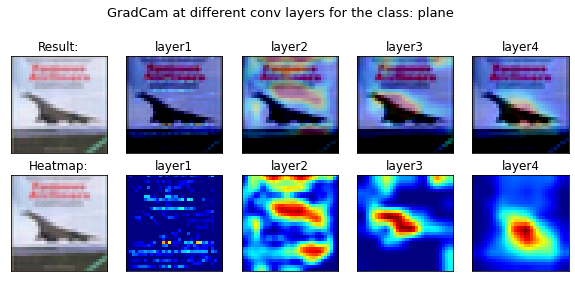

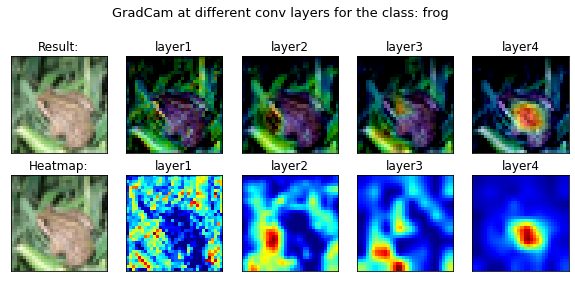

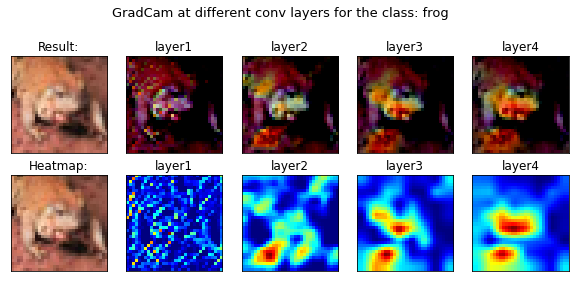

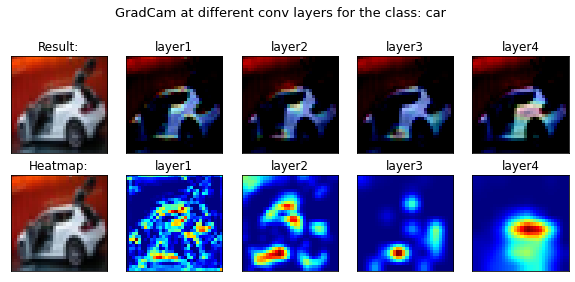

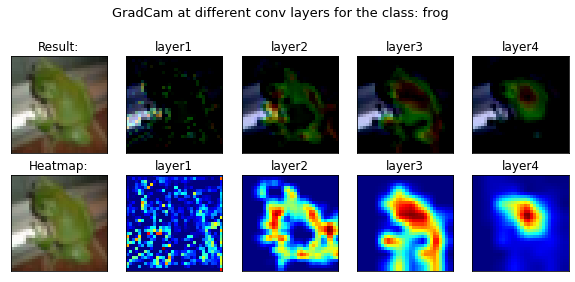

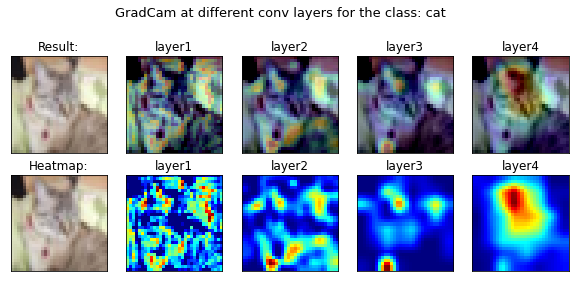

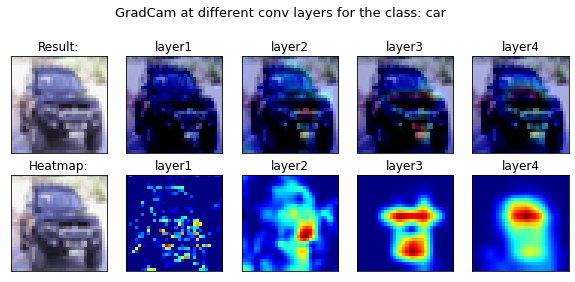

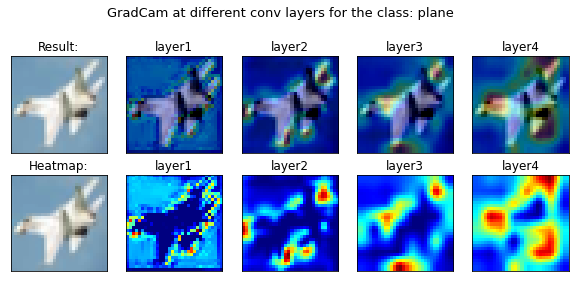

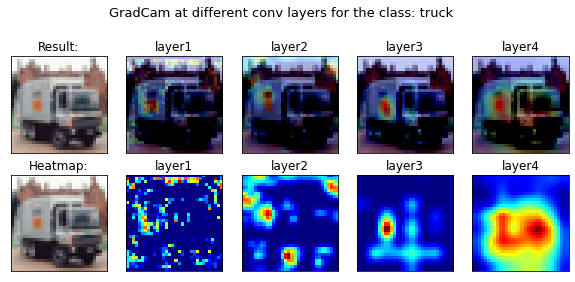

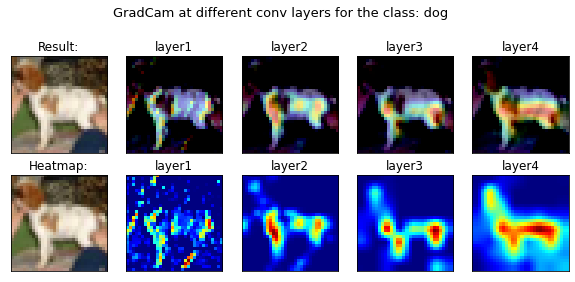

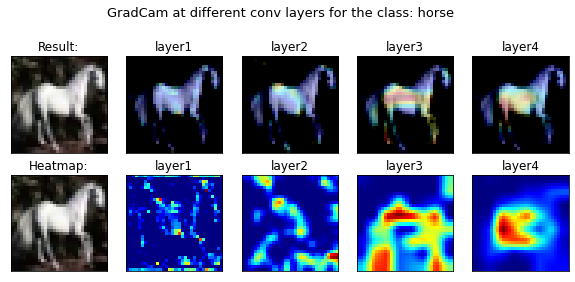

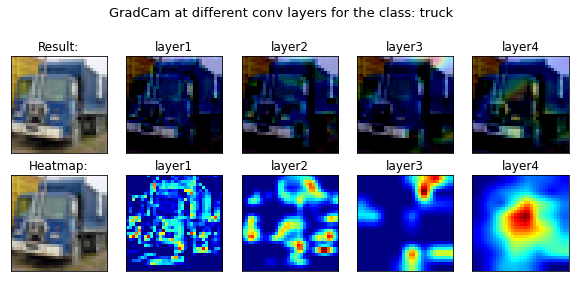

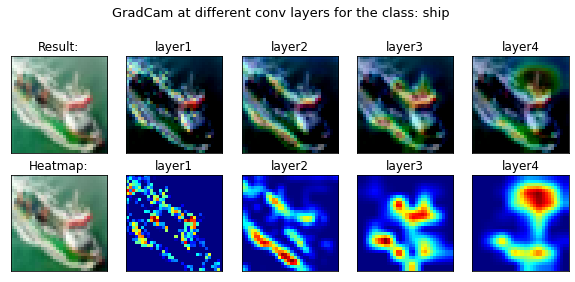

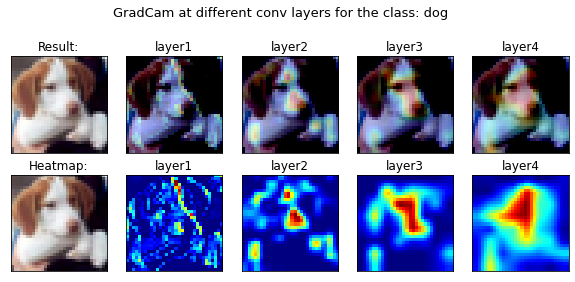

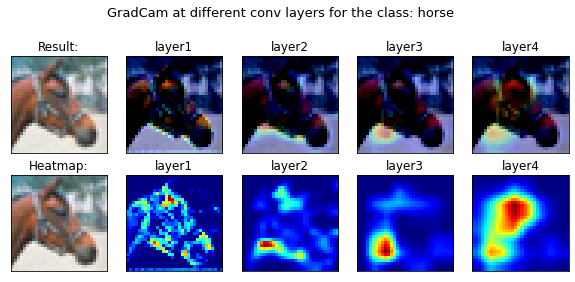

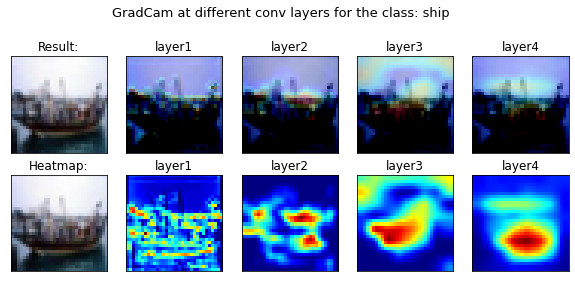

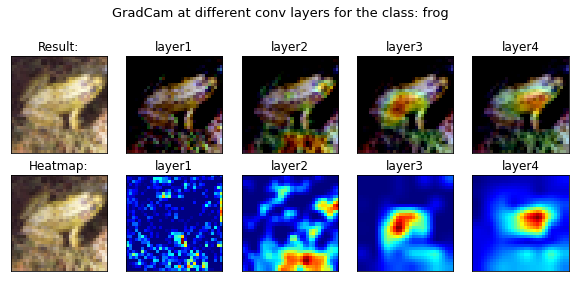

In [ ]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = VisualizeCam(net,classes, target_layers)
num_img = 20
correct_pred_imgs = []
count = 0
for i in range(num_img):
  correct_pred_imgs.append(torch.as_tensor(correct_images[i]["img"]))
viz_cam(torch.stack(correct_pred_imgs), target_layers, metric="correct")

## Plot gradcam for incorrectly predicted Images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


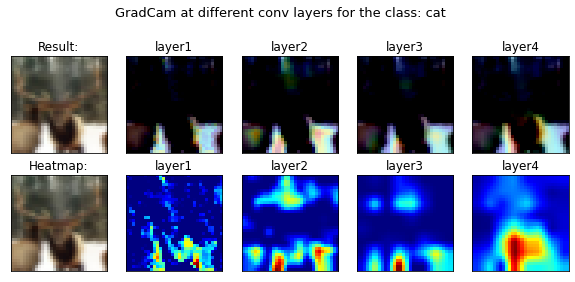

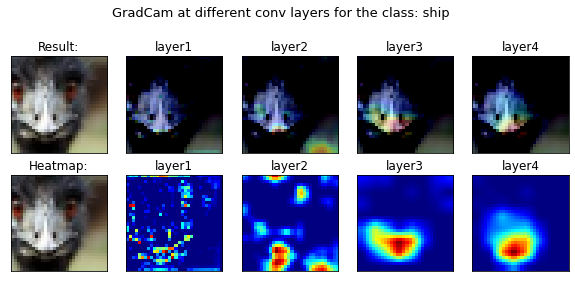

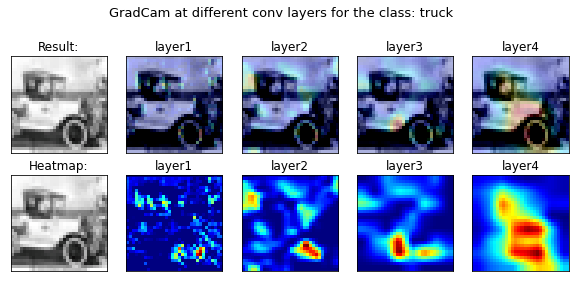

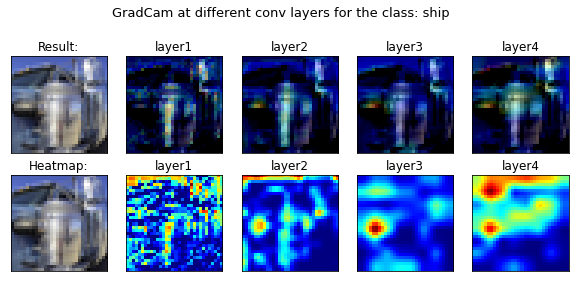

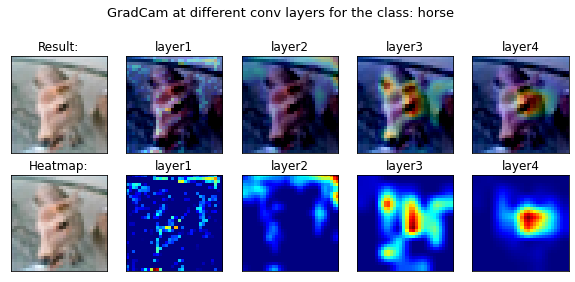

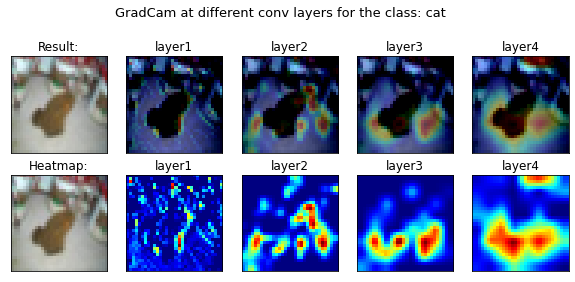

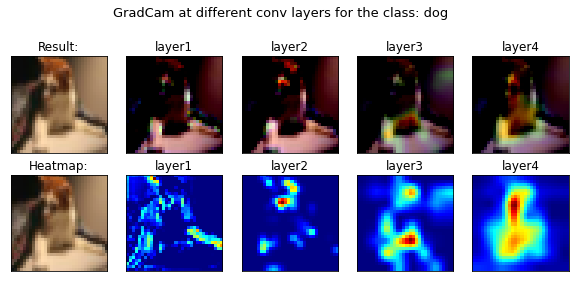

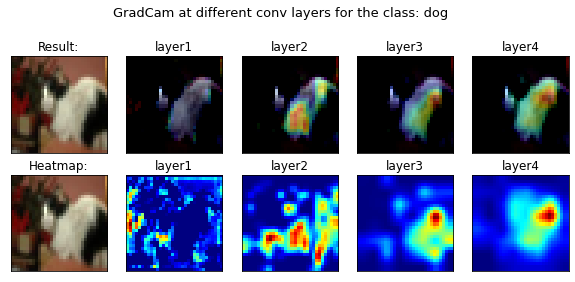

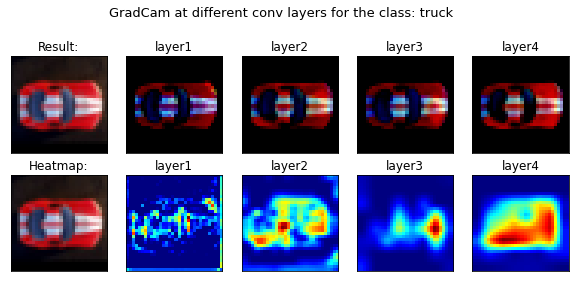

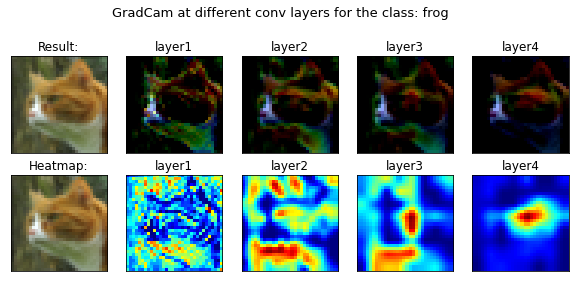

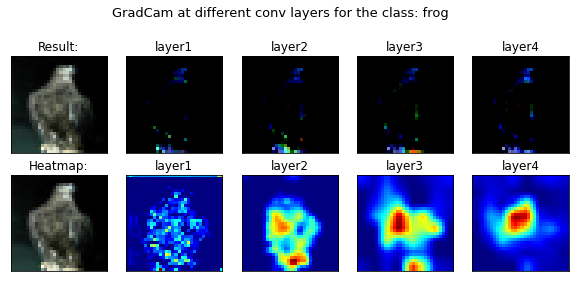

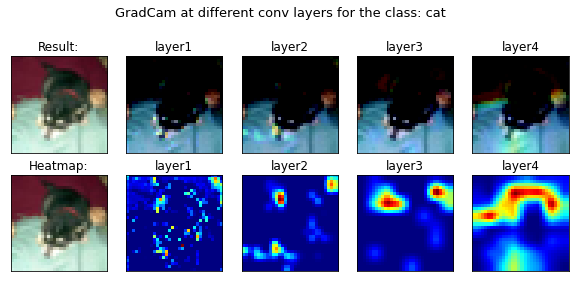

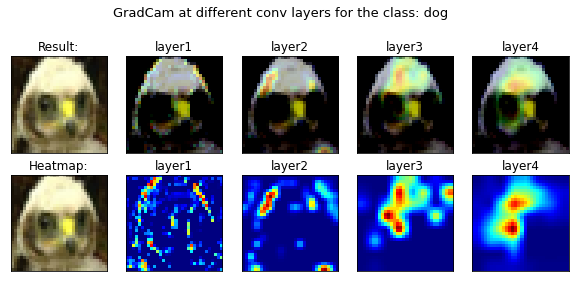

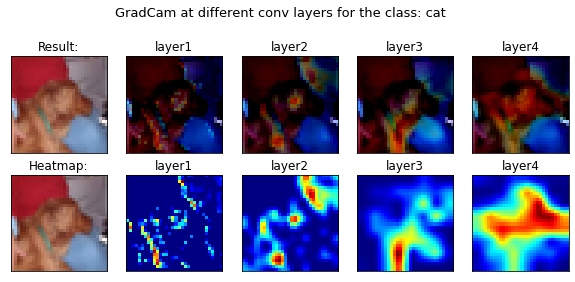

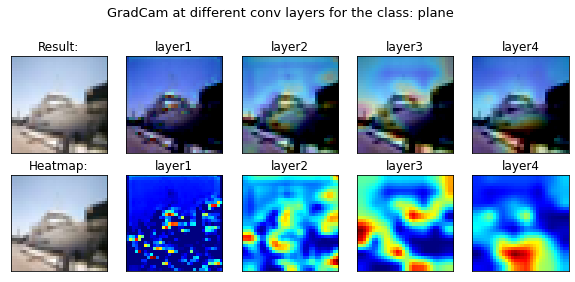

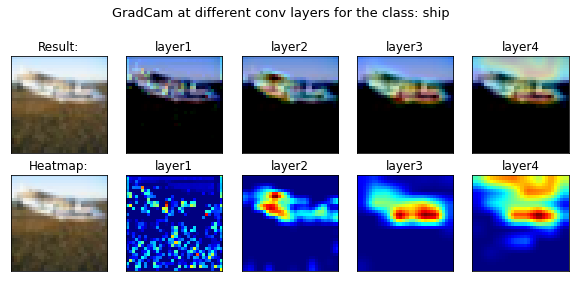

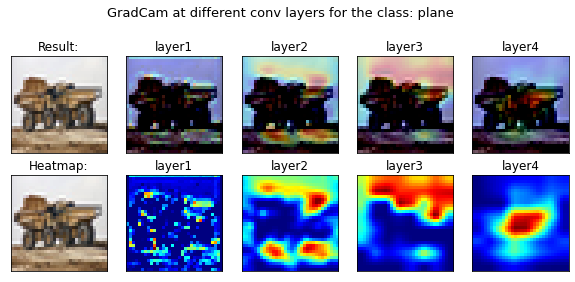

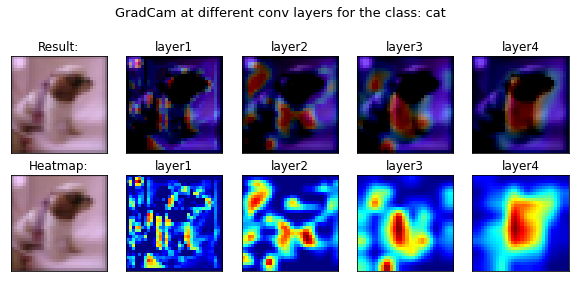

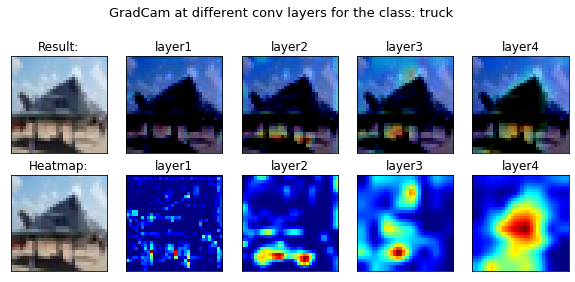

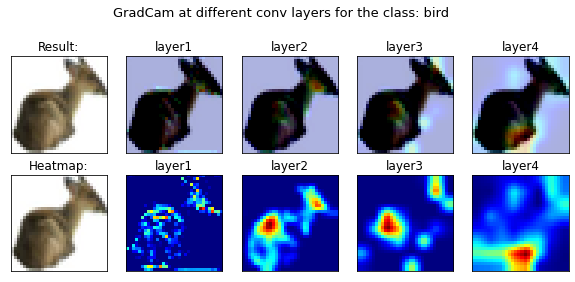

In [ ]:
incorrect_pred_imgs = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(incorrect_images[i]["img"]))
viz_cam(torch.stack(incorrect_pred_imgs), target_layers, metric="incorrect")